In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score


### dataset is generated

In [25]:
X = 6 * np.random.rand(200, 1) - 3           
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)        

# y = 0.8x^2 + 0.9x + 2  + noise    (noise is so that values badle thoda mtlb vary kre)

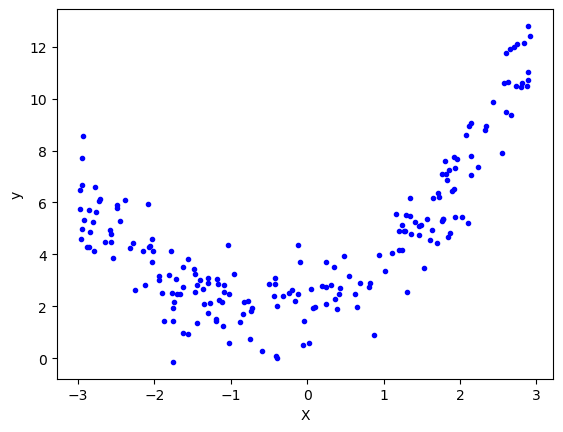

In [26]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
# Applying linear regression
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)  # phle normal linear regression krke dekha jisne straight line fit krdi
r2_score(y_test,y_pred)    # r2 score is low as data is not linear

0.34734833110310026

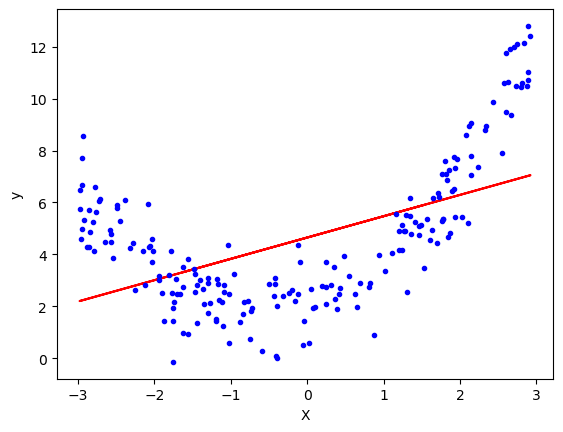

In [31]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [32]:
# Applying Polynomial Linear Regression
# degree 2   mtlb x^2 tak ke features bnaega
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [33]:
print(X_train[0])
print(X_train_trans[0])

[1.52721746]
[1.         1.52721746 2.33239316]


In [34]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test_trans)

In [36]:
r2_score(y_test,y_pred)

0.8649937233857361

In [37]:
print(lr.coef_)
print(lr.intercept_)    # saare coefficients bohot close mile h

[[0.         0.9403892  0.79462415]]
[2.06589967]


In [38]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

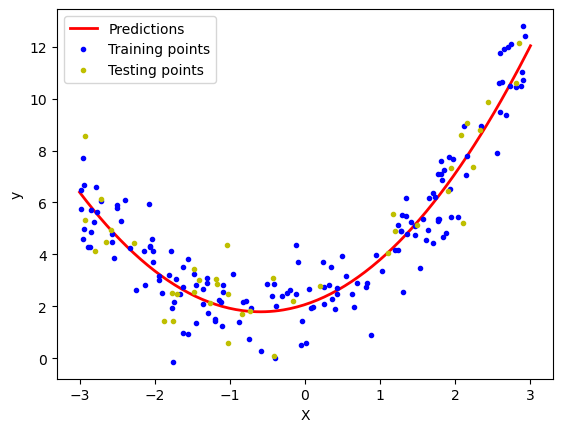

In [39]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "y.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()